In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_column', None)

In [4]:
data = pd.read_csv('../Data/02_processed/properties.csv', low_memory=False)

In [5]:
data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


# 1. Exploratory Data Analysis  
## Objectif :  
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)  
- Développer une premiere stratégie de modélisation



## Checklist de base  
Analyse de forme :  
- **variable target** : logerror
- **lignes et colonnes** : 90275 lignes, 60 colonnes 
- **types de variables** : 53 float, 6 object, 1 int
- **analyse des valeurs manquantes** : 
 - beaucoup de NaN (1/3 des variables avec > 70% de NaN),  
  - certaines variables ont un % de NaN similaire

Analyse de fond :  
- **visualisation de la target** : 1 894 logerror différents au total
- **signification des variables** :  
- **relation variables / target** :  

## Analyse plus détaillée  

**Relation Variables / Variables** :   

**NaN analyse** : 

## Hypotheses nulle (H0):  

H0 = 

## Analyse de la forme des données

In [6]:
df = data.copy()

In [7]:
df.shape

(90275, 60)

In [8]:
df.dtypes.value_counts()

float64    53
object      6
int64       1
dtype: int64

<AxesSubplot:>

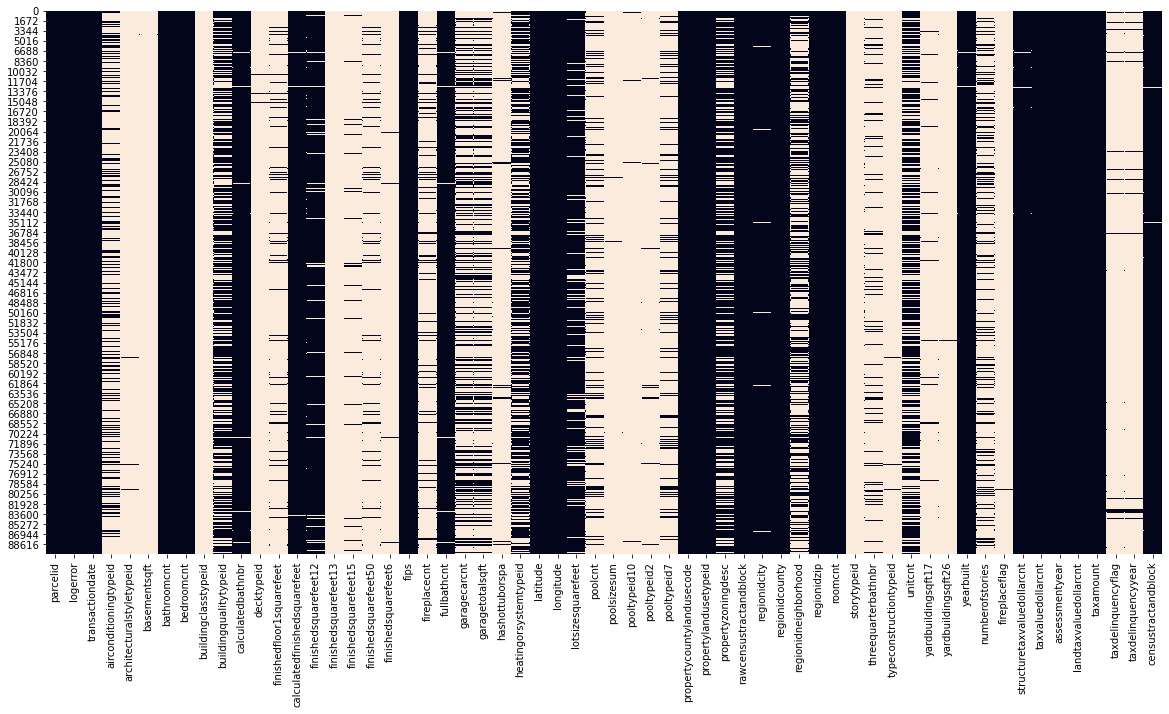

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [10]:
(df.isna().sum()/df.shape[0]).sort_values()

parcelid                        0.000000
longitude                       0.000000
propertylandusetypeid           0.000000
rawcensustractandblock          0.000000
regionidcounty                  0.000000
roomcnt                         0.000000
latitude                        0.000000
fips                            0.000000
bathroomcnt                     0.000000
assessmentyear                  0.000000
transactiondate                 0.000000
logerror                        0.000000
bedroomcnt                      0.000000
taxvaluedollarcnt               0.000011
landtaxvaluedollarcnt           0.000011
propertycountylandusecode       0.000011
taxamount                       0.000066
regionidzip                     0.000388
structuretaxvaluedollarcnt      0.004209
censustractandblock             0.006702
calculatedfinishedsquarefeet    0.007322
yearbuilt                       0.008374
fullbathcnt                     0.013093
calculatedbathnbr               0.013093
regionidcity    

In [11]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.7]]

<AxesSubplot:>

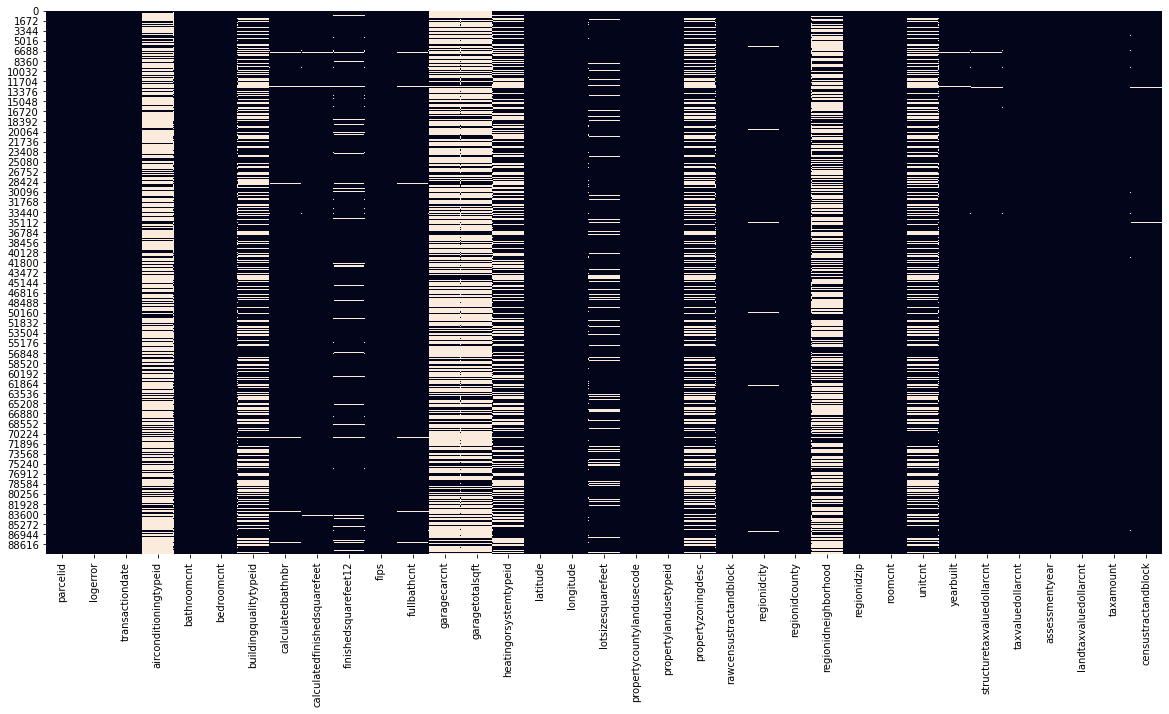

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [13]:
df = df.drop('parcelid', axis = 1)

In [14]:
df['logerror'].value_counts(normalize = True)

0.0030    0.010390
0.0020    0.010136
0.0050    0.010091
0.0010    0.009981
0.0070    0.009726
            ...   
2.5520    0.000011
0.6750    0.000011
0.7701    0.000011
0.7453    0.000011
0.7505    0.000011
Name: logerror, Length: 1894, dtype: float64

### Histogramme des valeurs continues

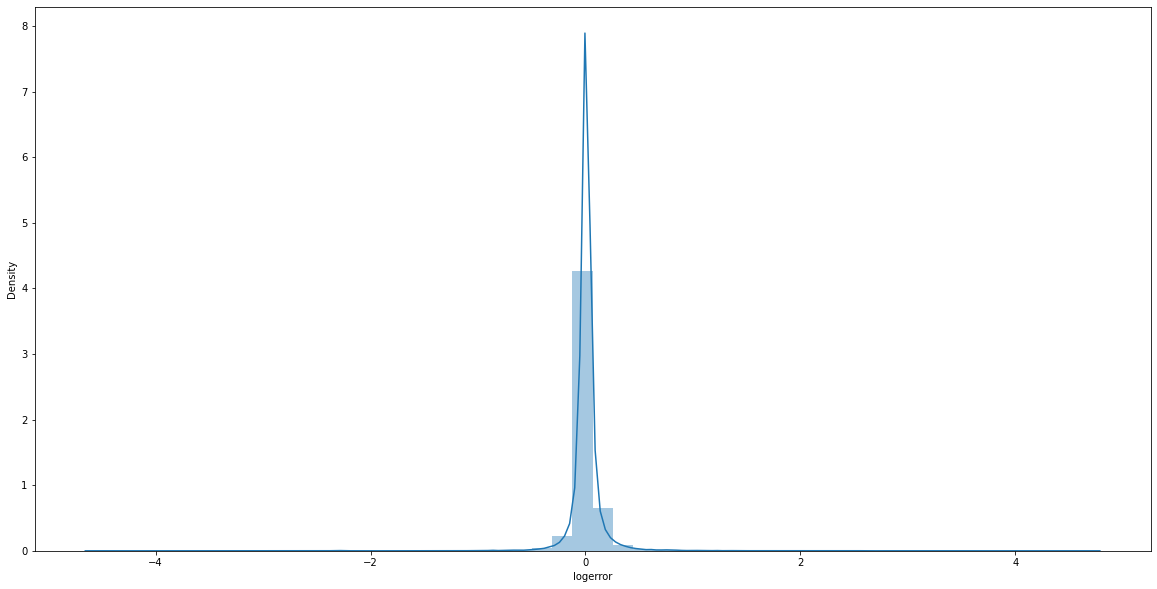

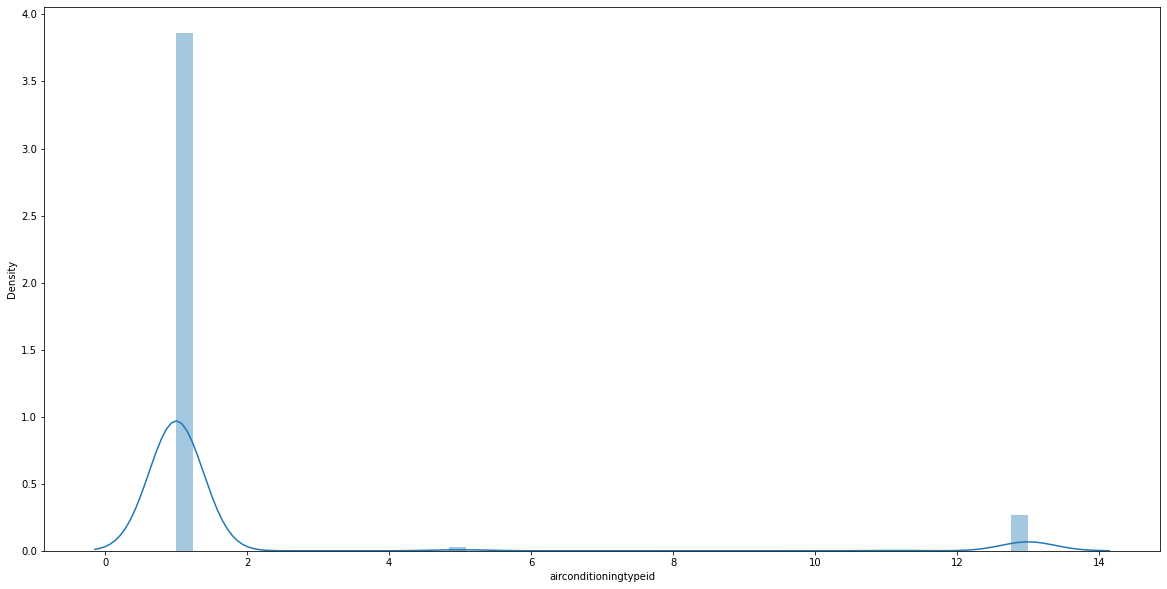

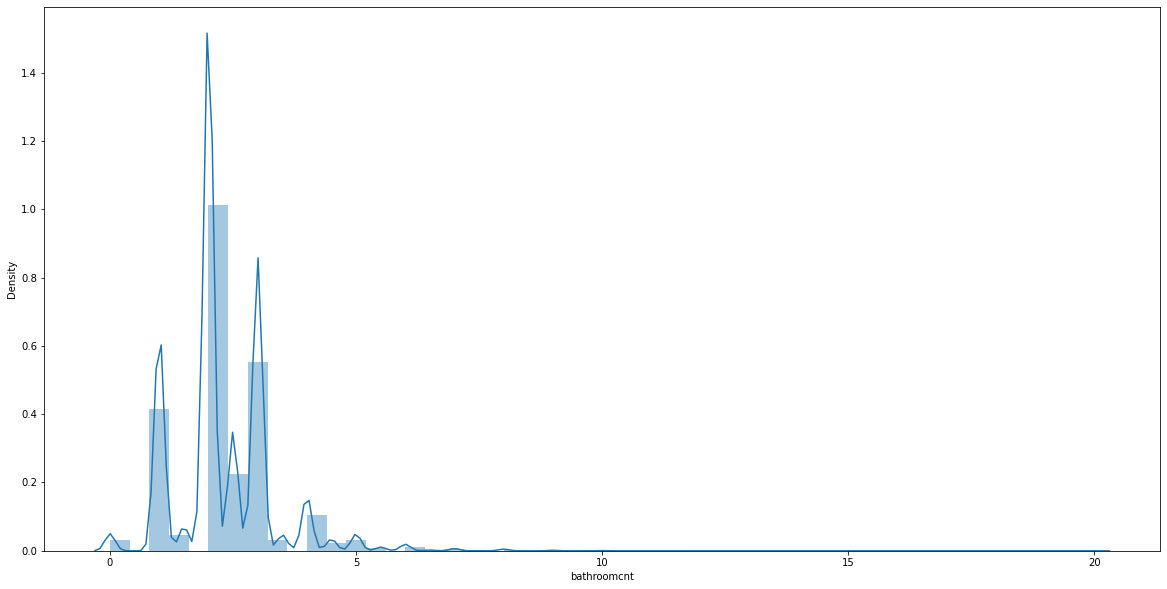

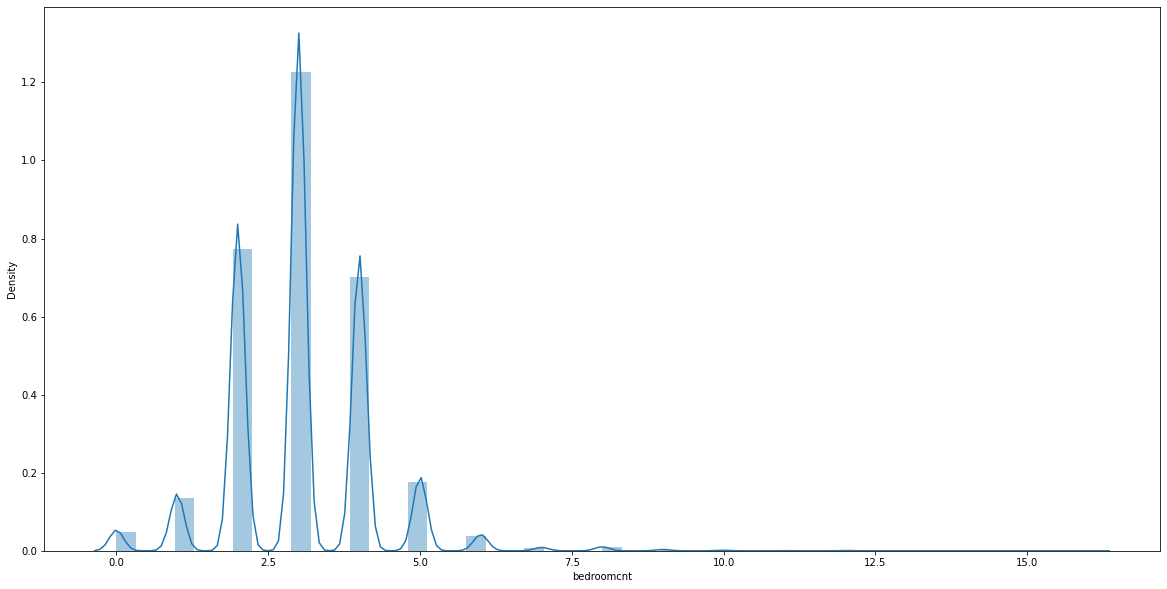

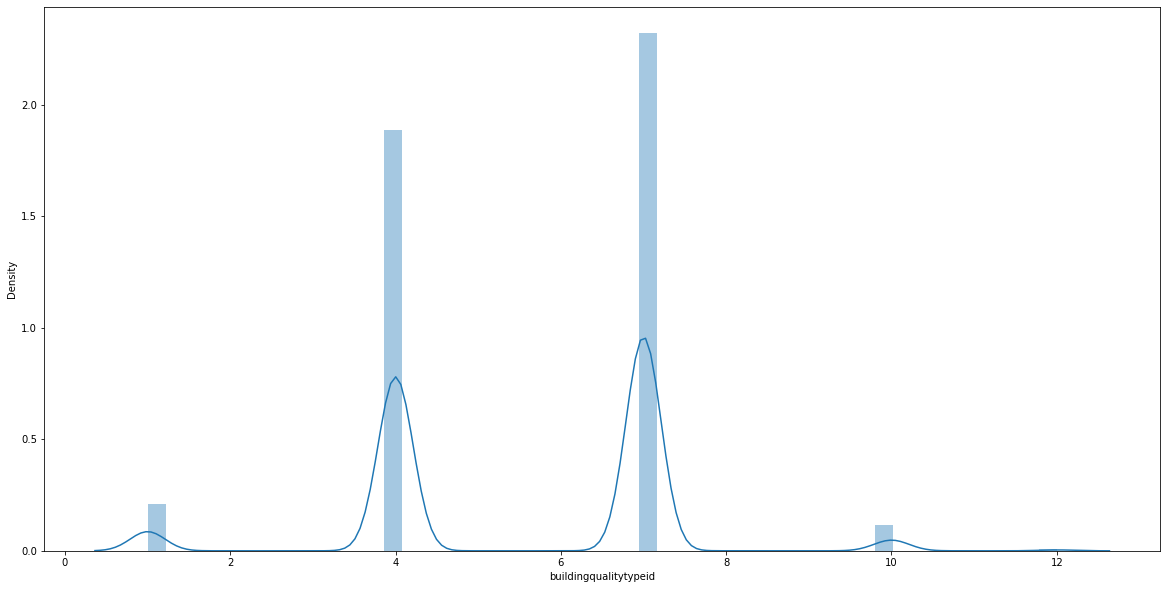

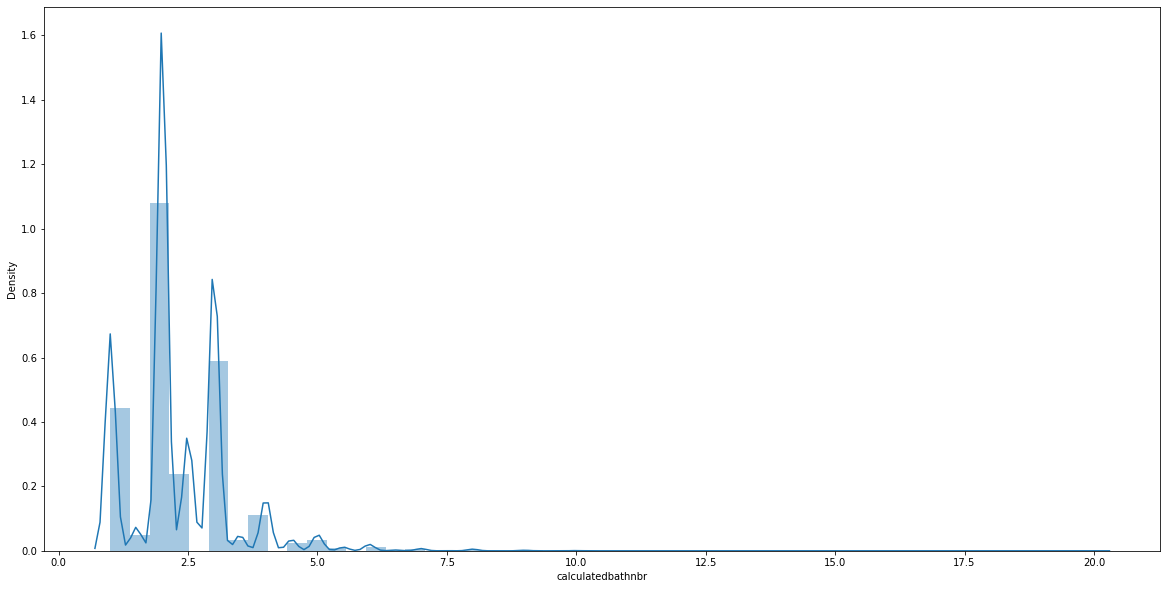

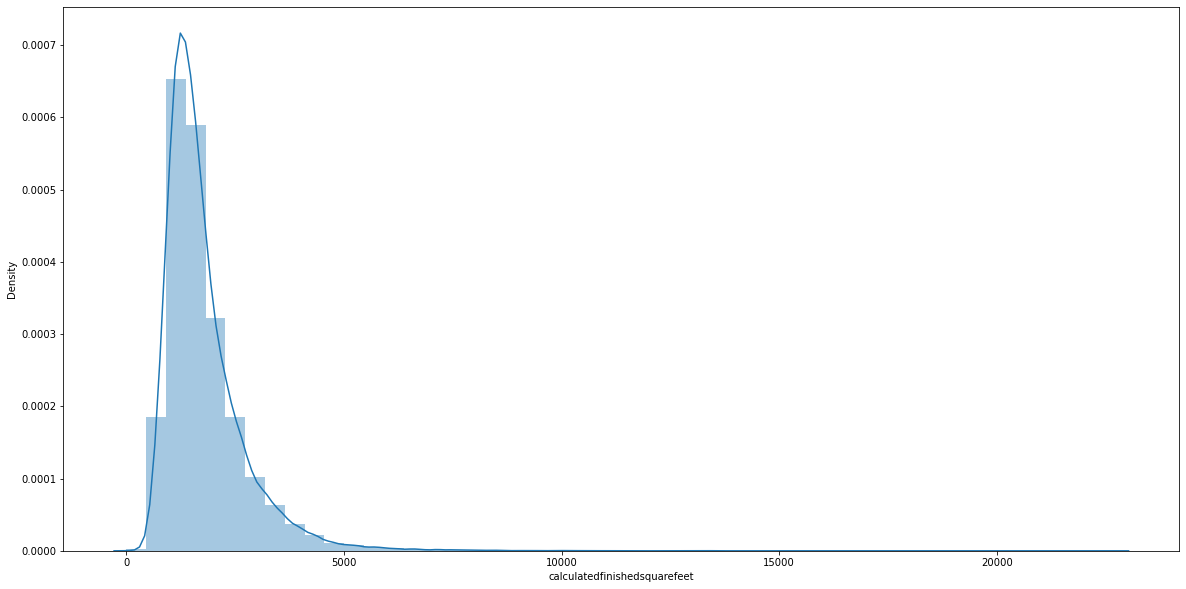

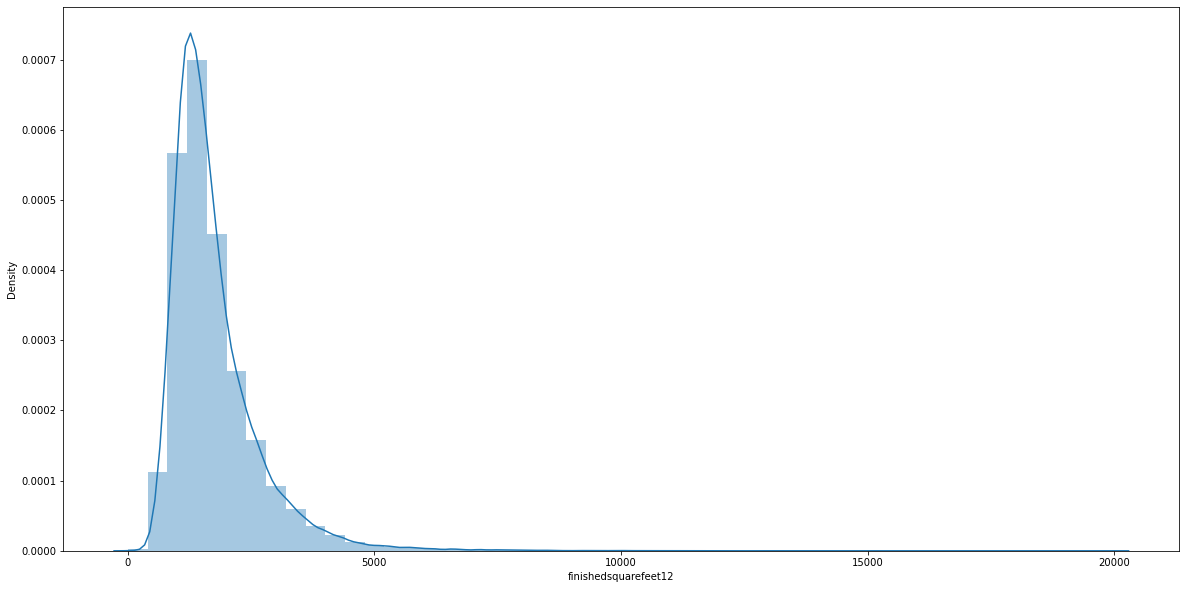

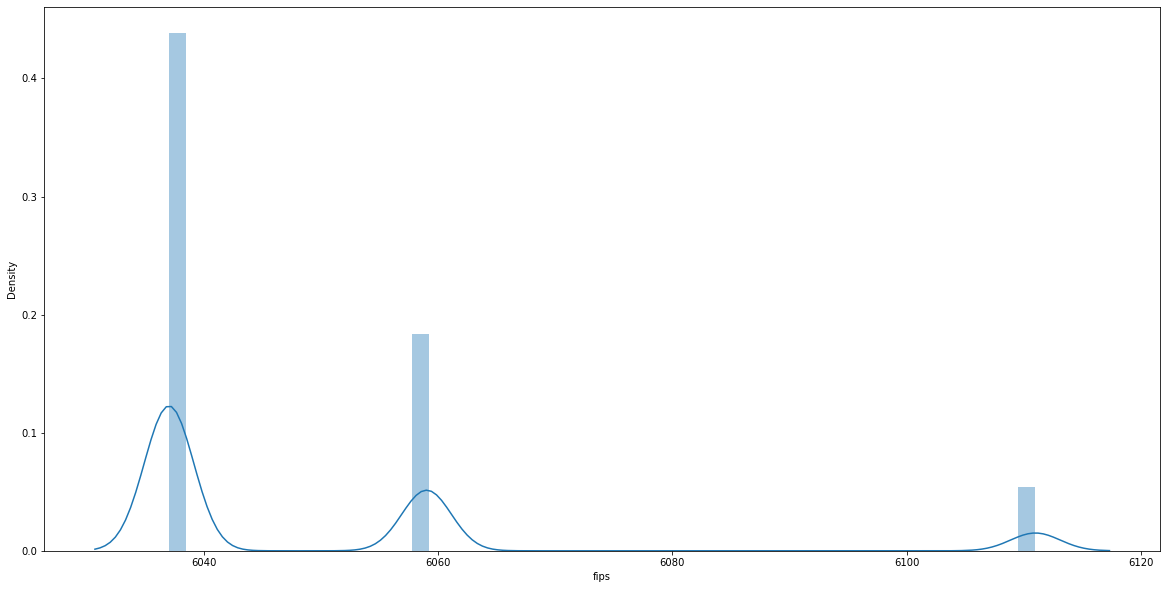

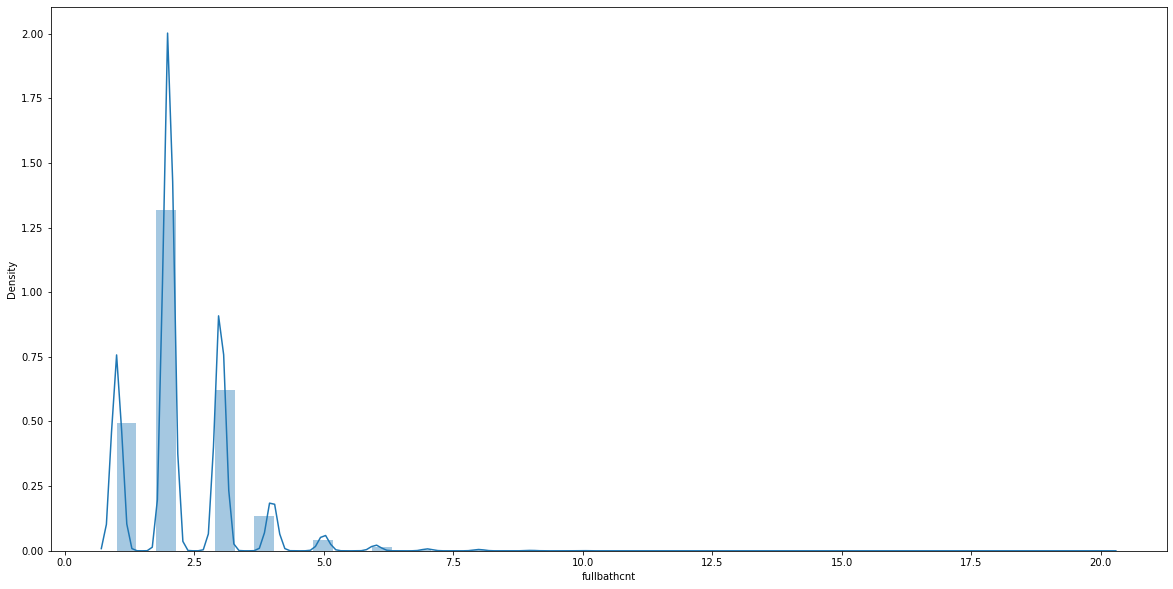

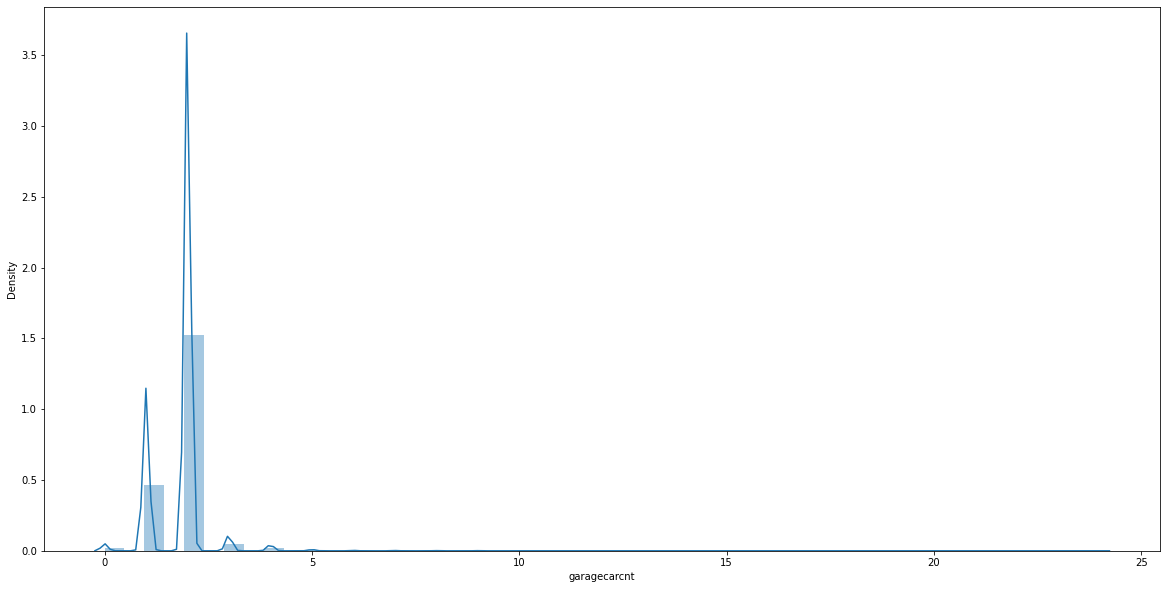

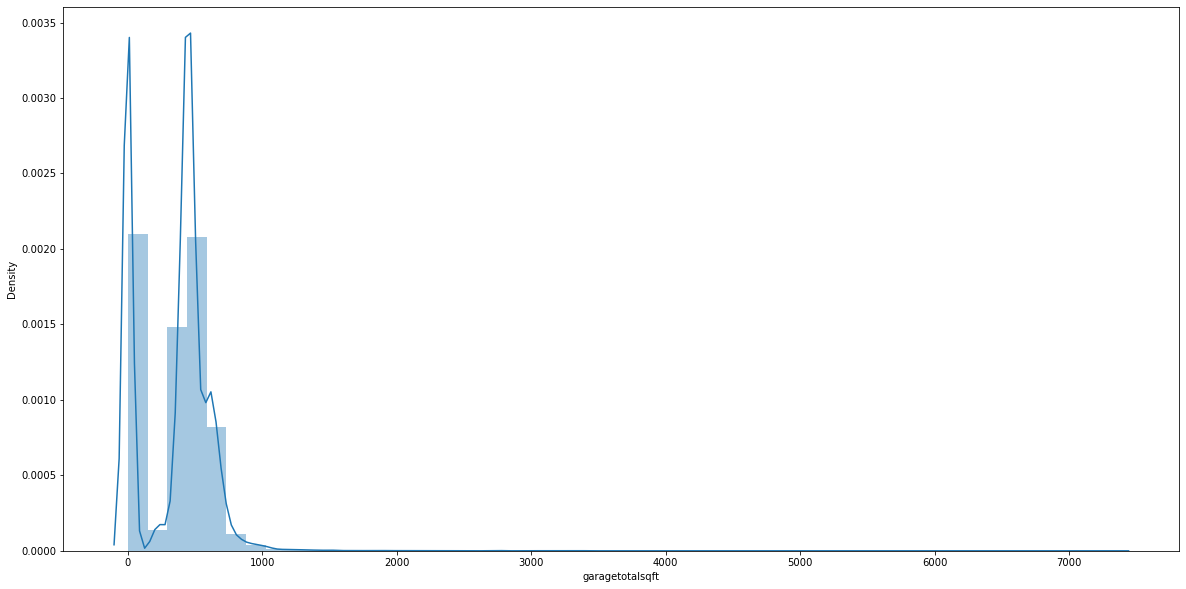

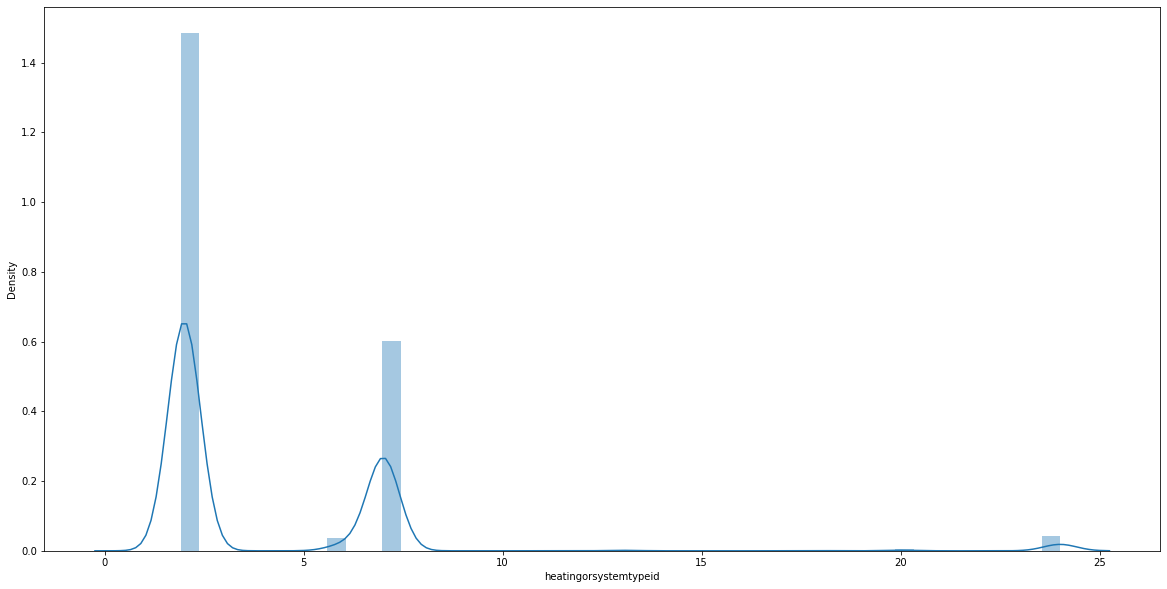

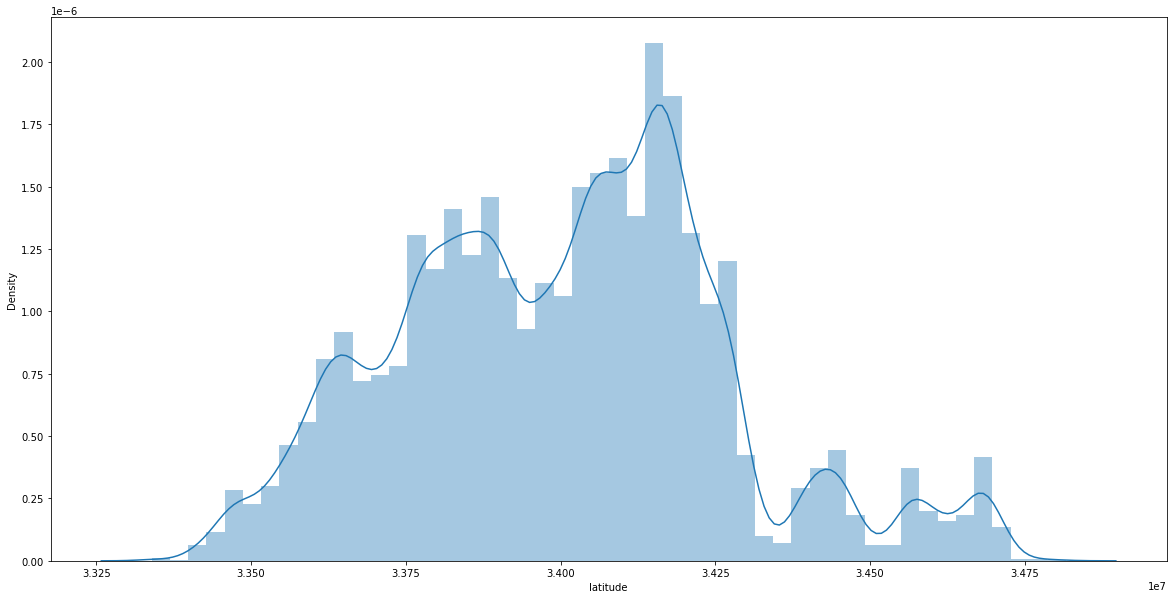

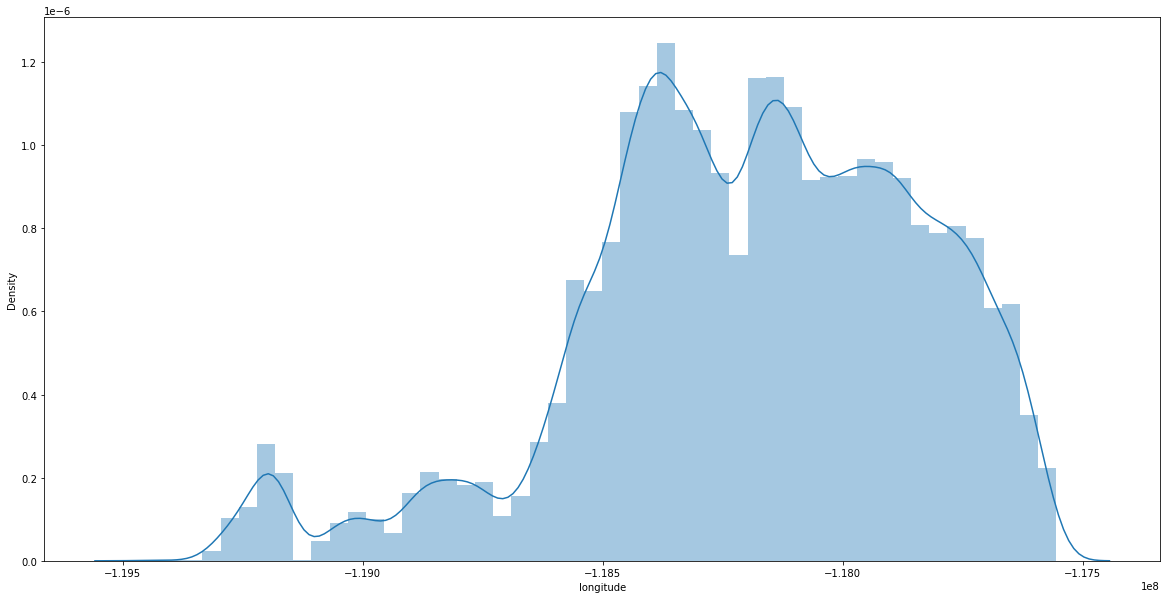

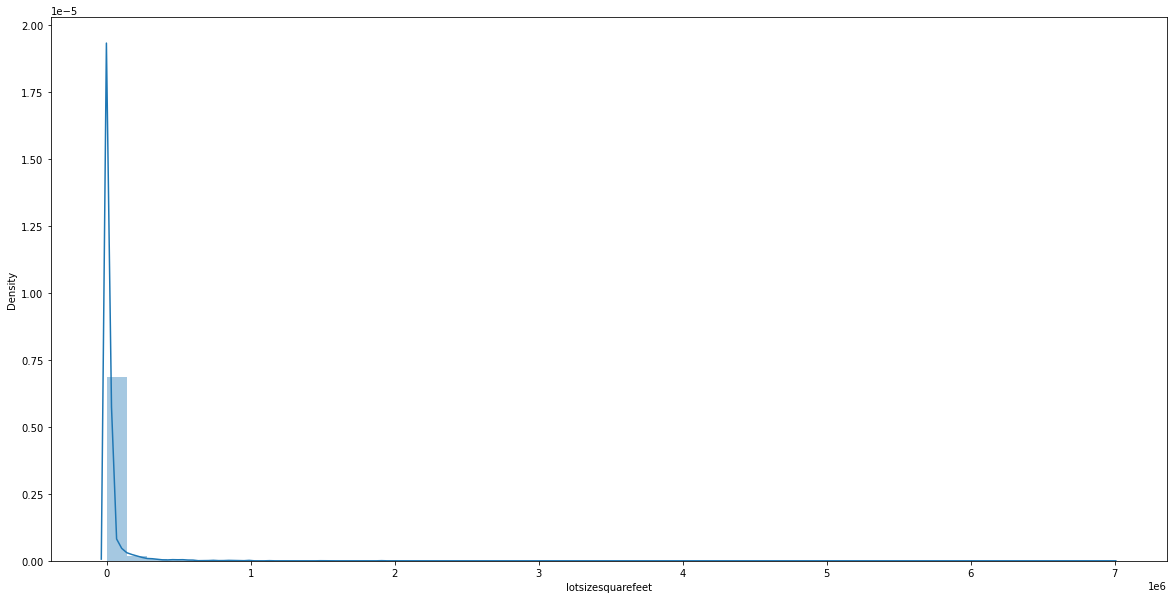

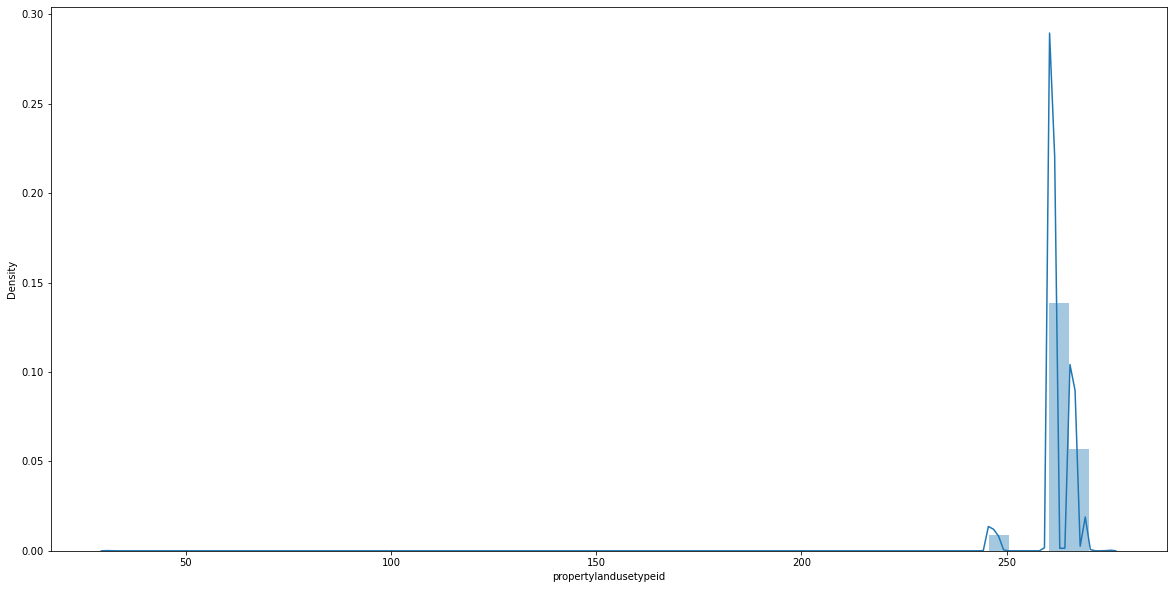

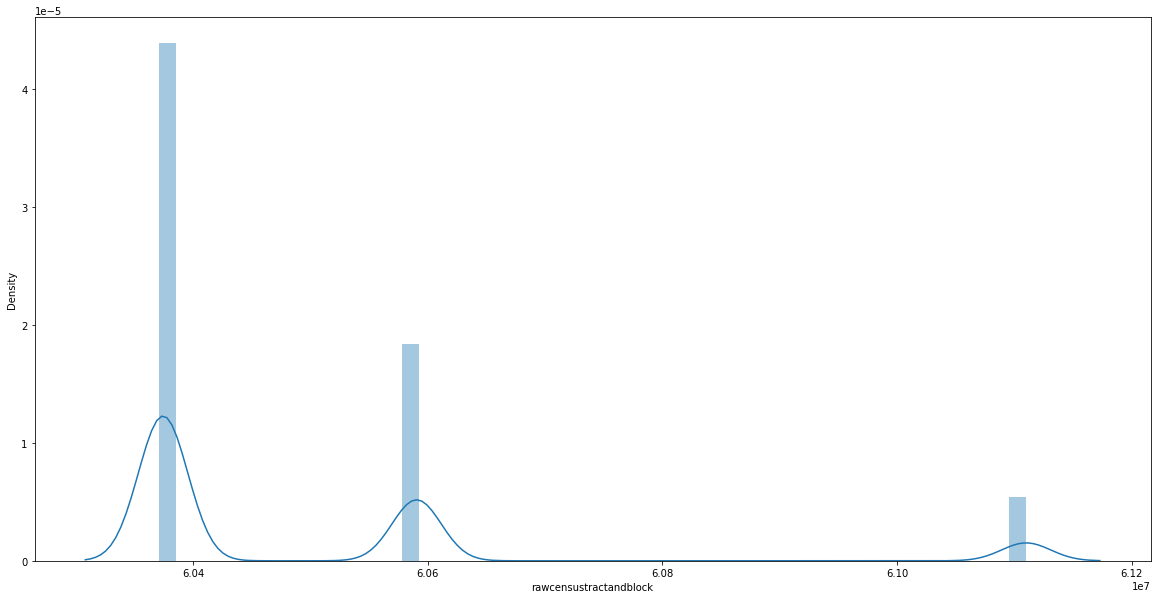

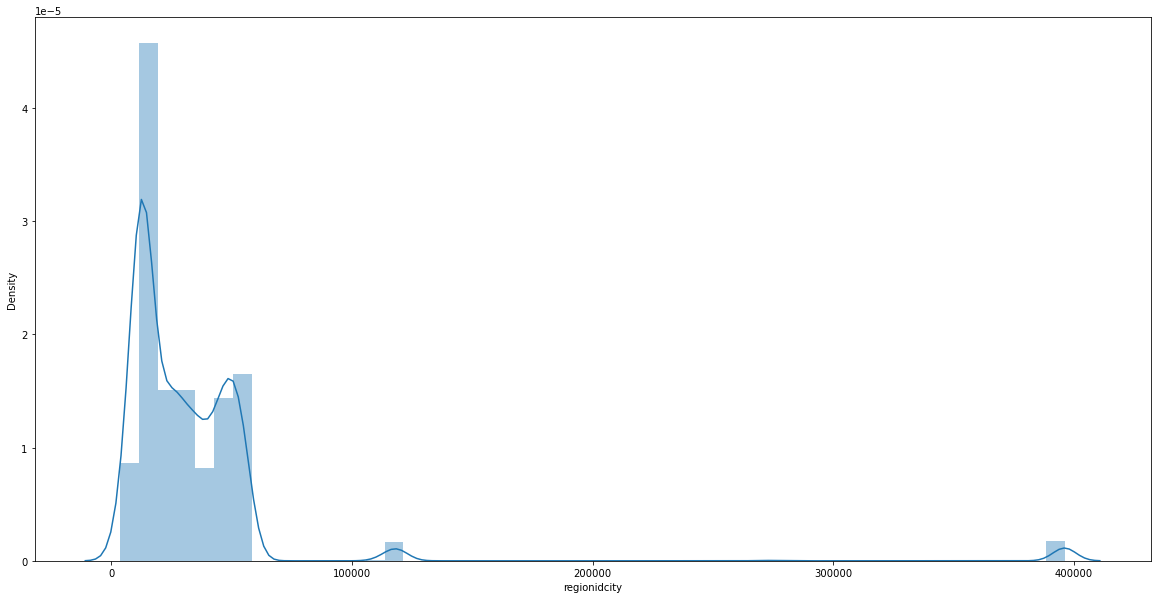

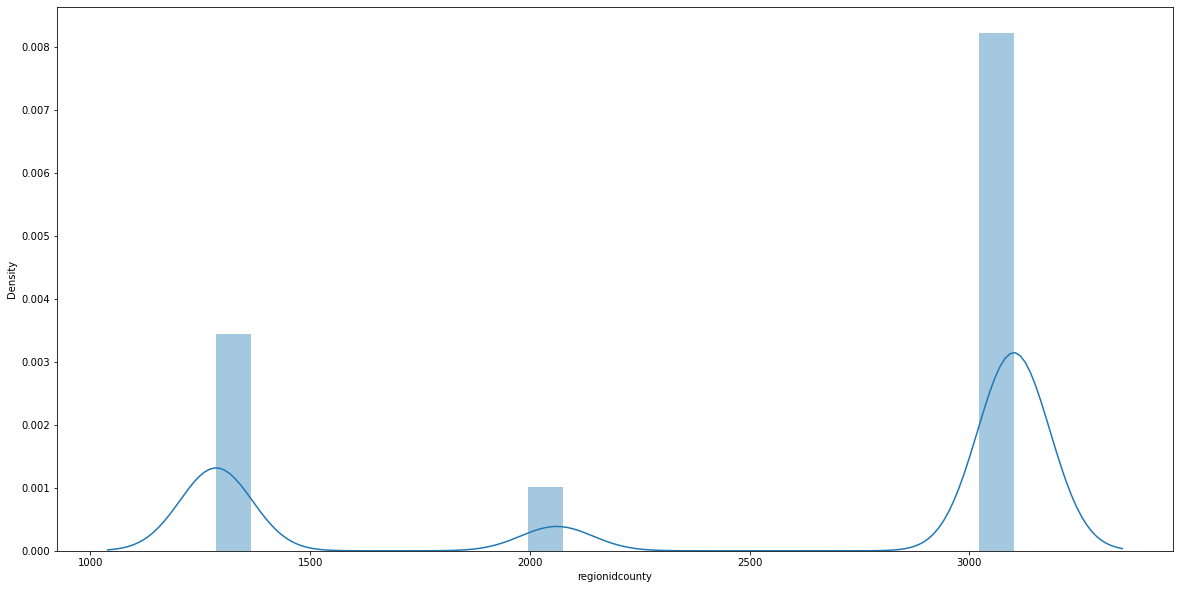

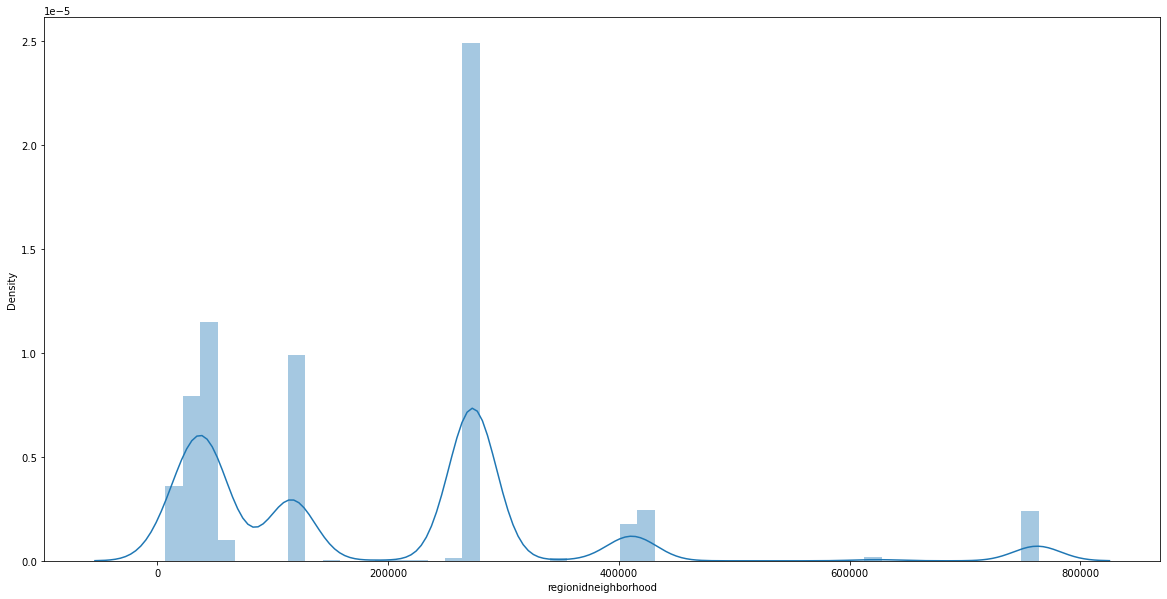

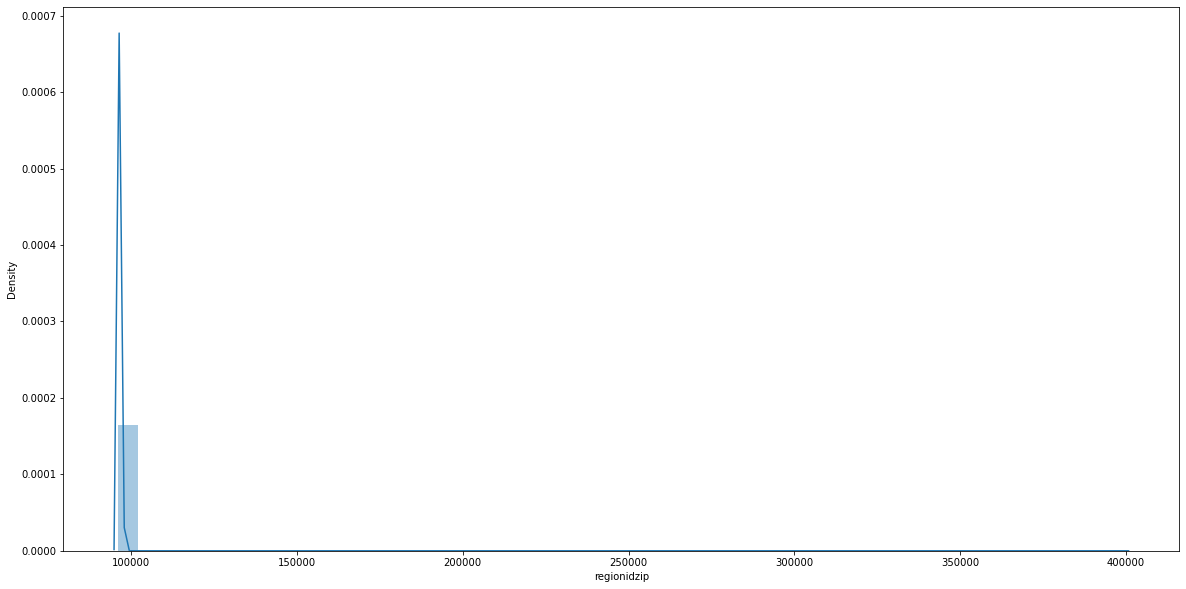

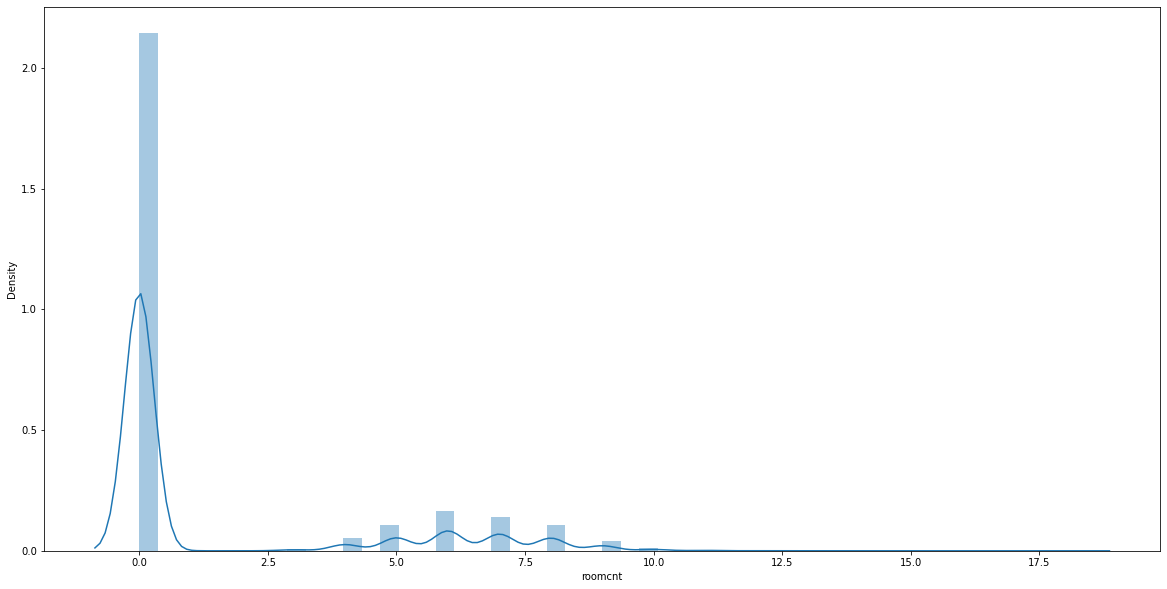

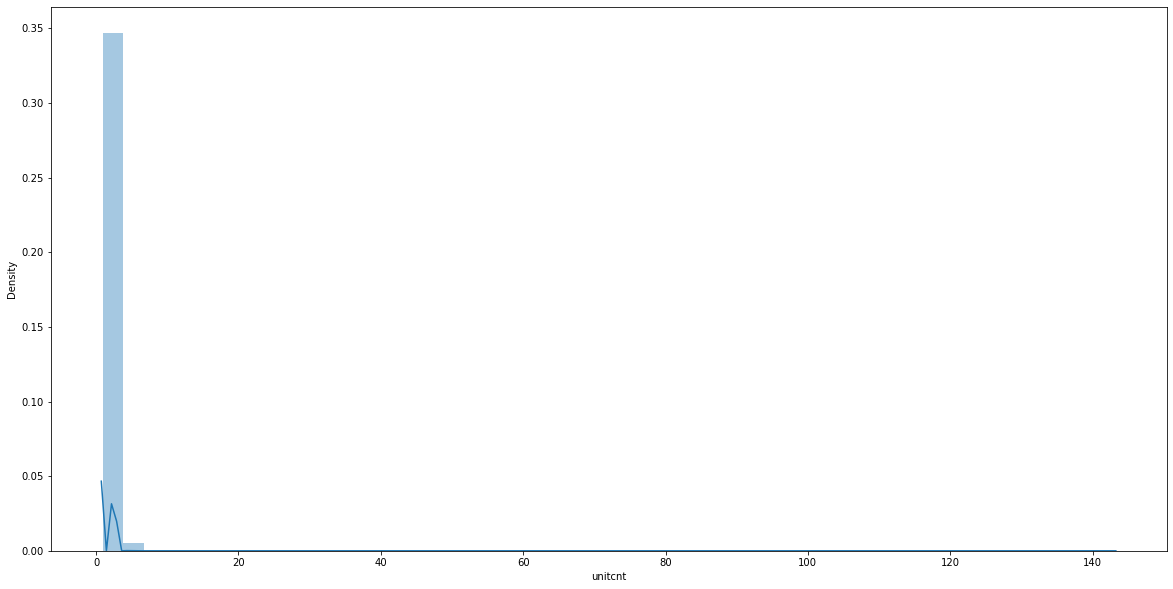

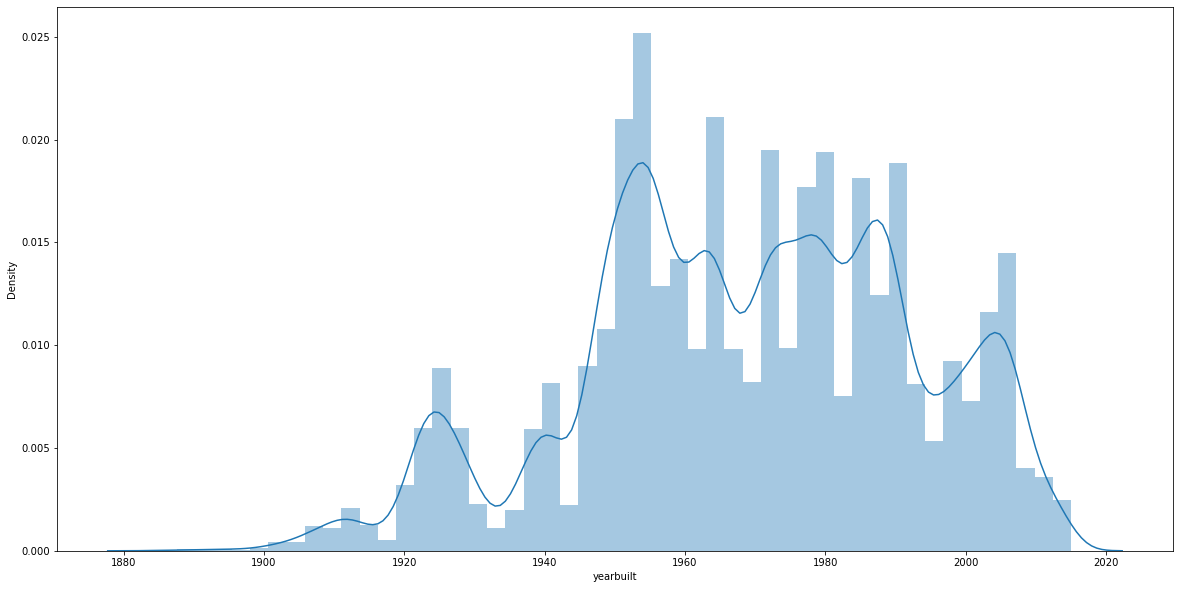

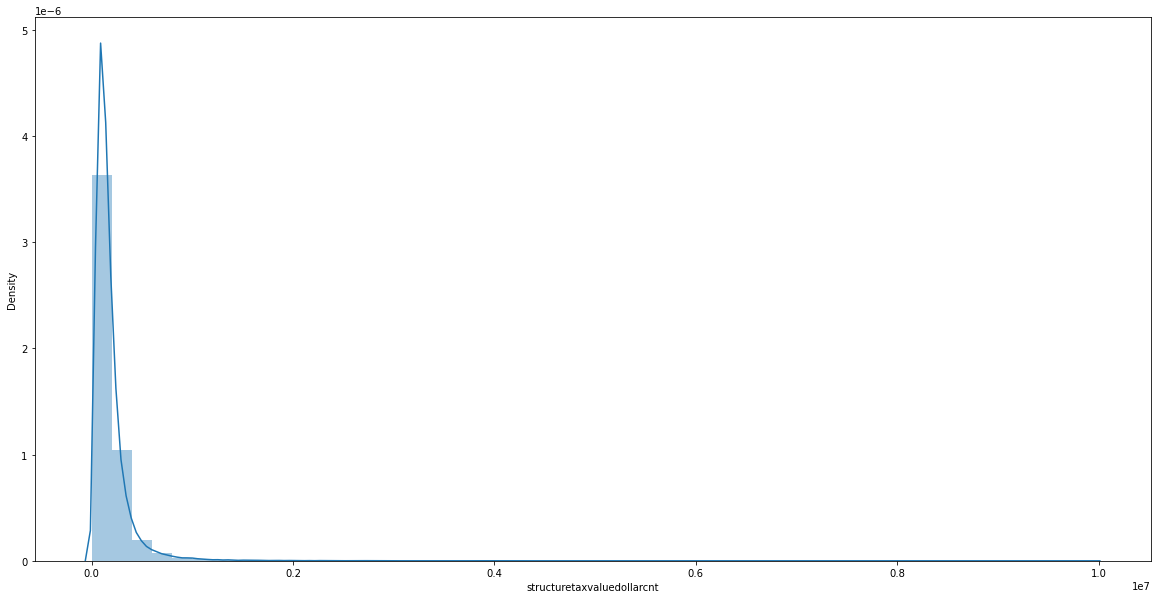

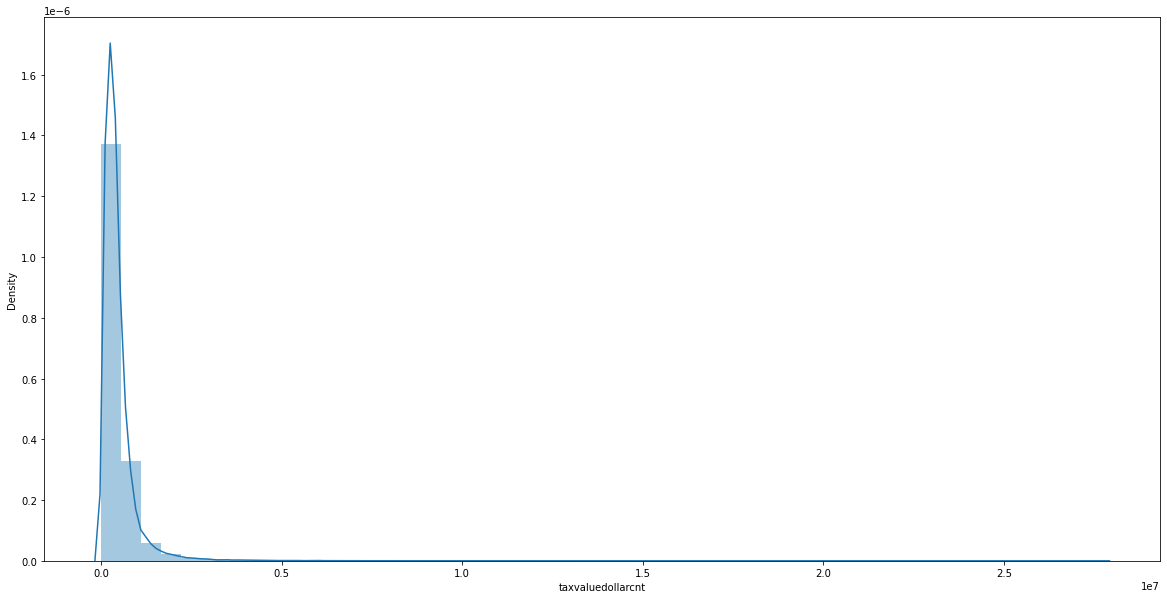

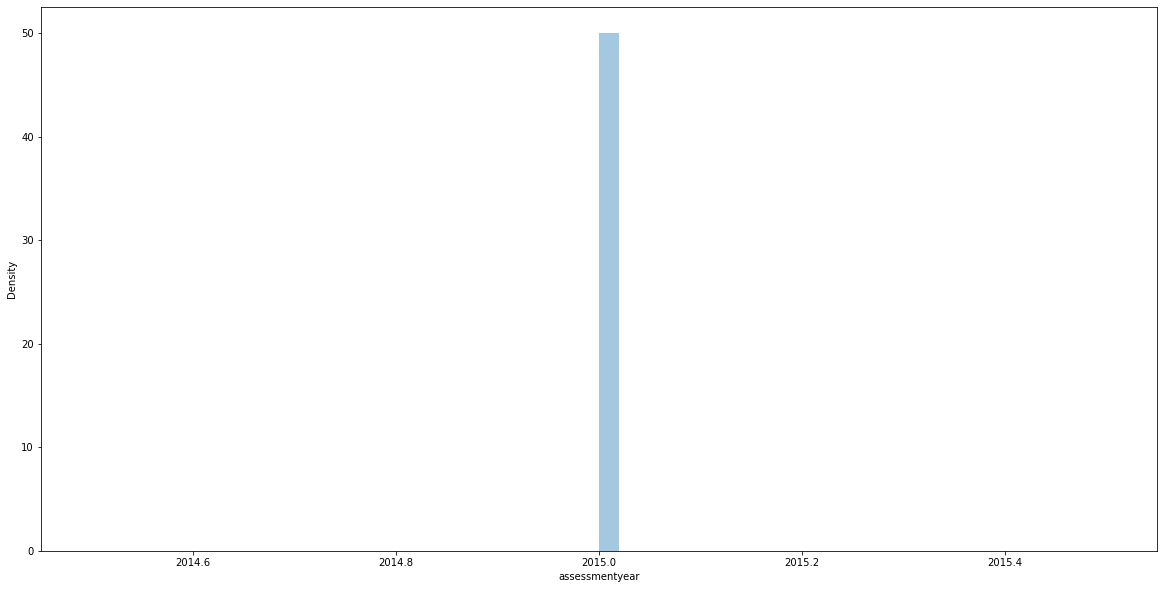

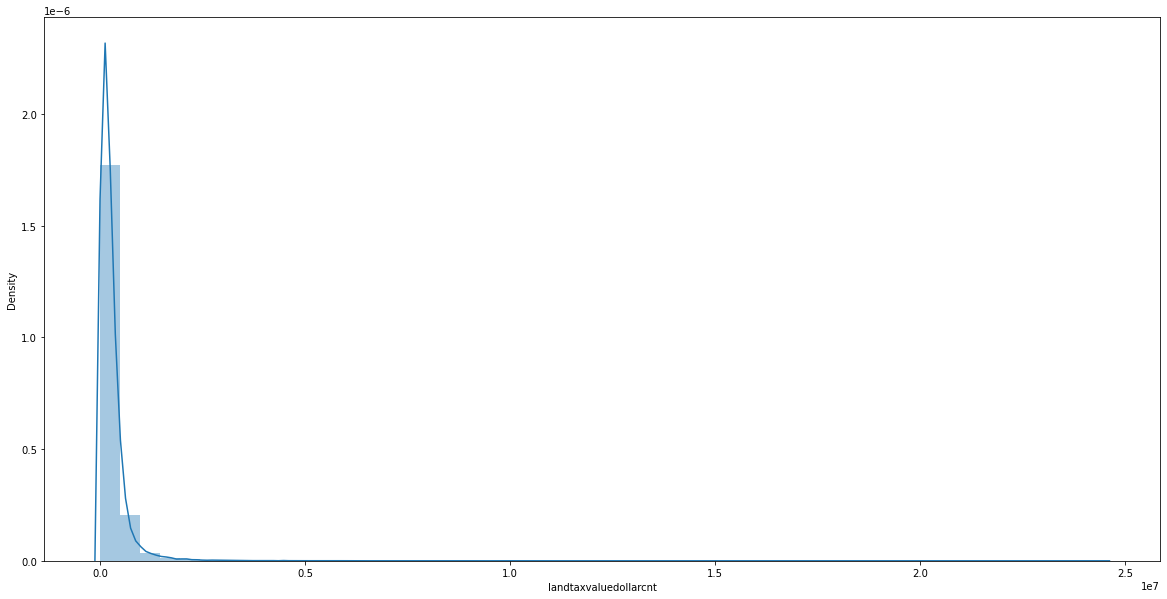

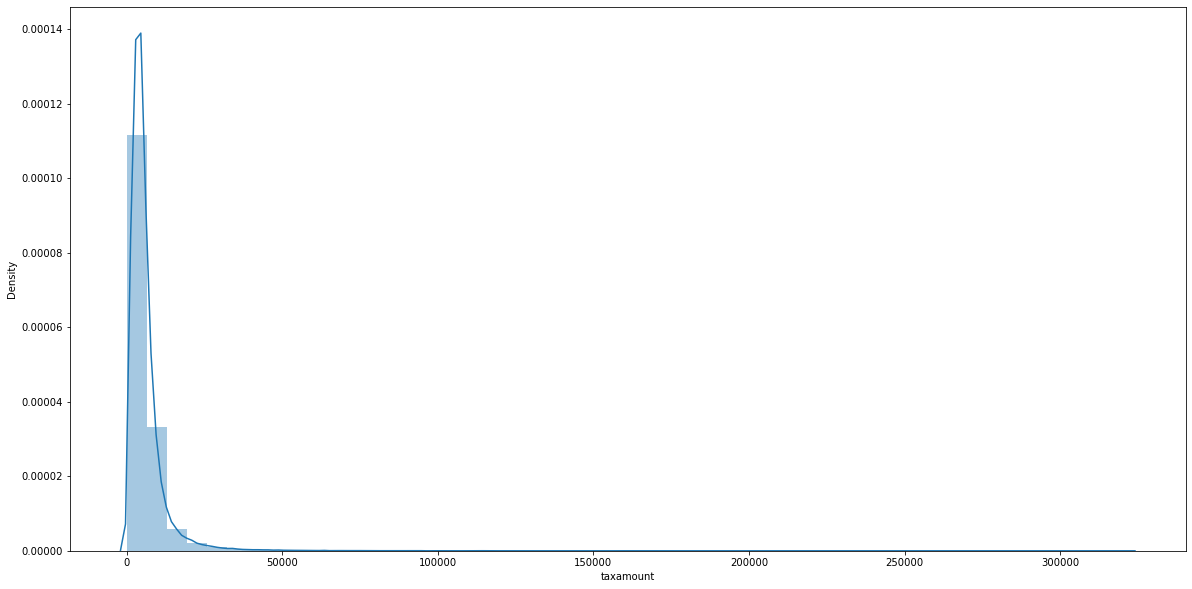

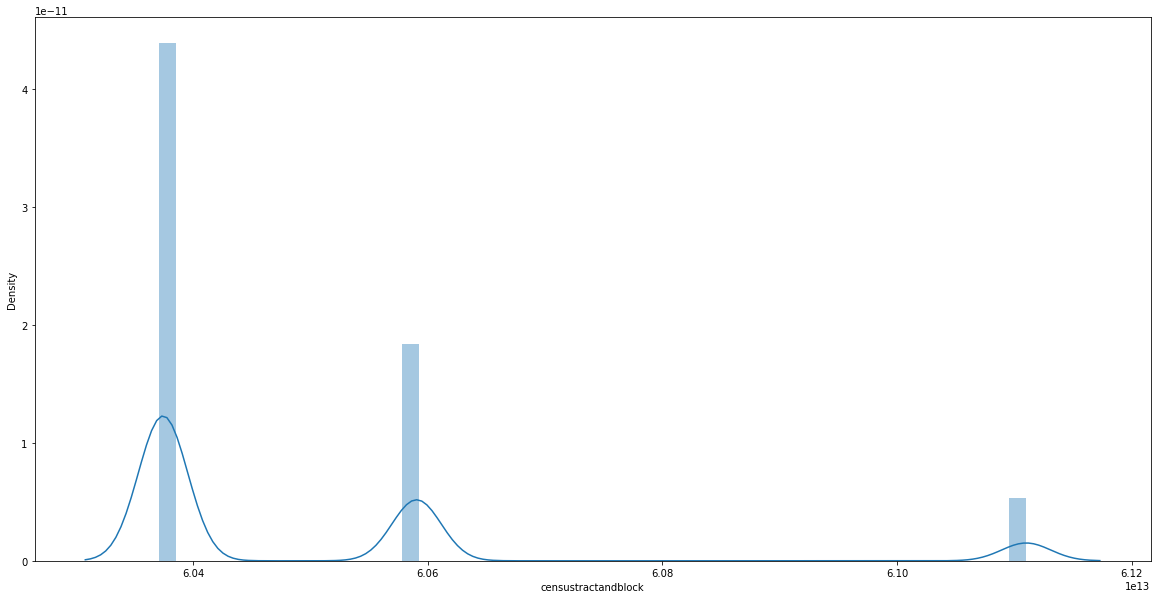

In [15]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(20,10))
    sns.distplot(df[col])

### Variables qualitatives

In [16]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40} {df[col].unique()}')

transactiondate------------------------- ['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-06-29' '2016-01-06' '2016-09-12' '2016-06-17' '2016-01-07'
 '2016-09-14' '2016-07-05' '2016-01-08' '2016-06-27' '2016-08-04'
 '2016-05-19' '2016-01-09' '2016-01-10' '2016-01-11' '2016-09-15'
 '2016-06-14' '2016-01-12' '2016-01-13' '2016-09-17' '2016-06-10'
 '2016-01-14' '2016-01-15' '2016-10-12' '2016-01-16' '2016-01-17'
 '2016-01-18' '2016-01-19' '2016-09-30' '2016-12-28' '2016-06-06'
 '2016-01-20' '2016-01-21' '2016-09-20' '2016-10-11' '2016-01-22'
 '2016-01-23' '2016-01-24' '2016-01-25' '2016-08-26' '2016-01-26'
 '2016-06-01' '2016-04-14' '2016-08-16' '2016-09-23' '2016-01-27'
 '2016-01-28' '2016-07-01' '2016-01-29' '2016-09-09' '2016-08-09'
 '2016-06-16' '2016-01-30' '2016-01-31' '2016-02-01' '2016-09-02'
 '2016-02-02' '2016-02-03' '2016-02-04' '2016-05-24' '2016-02-05'
 '2016-04-27' '2016-08-30' '2016-02-06' '2016-02-07' '2016-08-29'
 '2016-02-08' '2016-05-09' '2016-02